In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from warnings import filterwarnings
filterwarnings("ignore")

In [234]:
df=pd.read_excel('/content/Contraceptive_method_dataset.xlsx')

In [235]:
df.shape

(1473, 10)

In [236]:
df.head(5)

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [238]:
df.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [239]:
df['Wife_age'].fillna(int(df['Wife_age'].mean()), inplace=True)


In [240]:
df['No_of_children_born'].fillna(int(df['No_of_children_born'].median()), inplace=True)


In [241]:
df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [242]:
df.duplicated().sum()

85

In [243]:
df.drop_duplicates(inplace=True) 

In [244]:
df.duplicated().sum()

0

In [245]:
df.No_of_children_born.value_counts()

1.0     257
2.0     257
3.0     250
4.0     179
5.0     126
0.0      92
6.0      88
7.0      49
8.0      45
9.0      16
10.0     11
11.0     11
12.0      4
13.0      2
16.0      1
Name: No_of_children_born, dtype: int64

In [246]:
df.describe()

,Wife_age,No_of_children_born,Husband_Occupation
count,1388.000000,1388.000000,1388.000000
mean,32.533862,3.287464,2.177954
std,8.102151,2.385715,0.853782
min,16.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,38.000000,5.000000,3.000000
max,49.000000,16.000000,4.000000


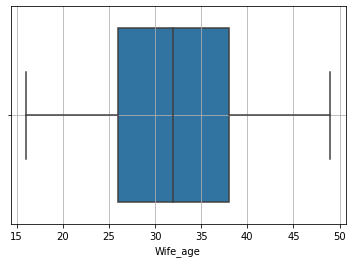

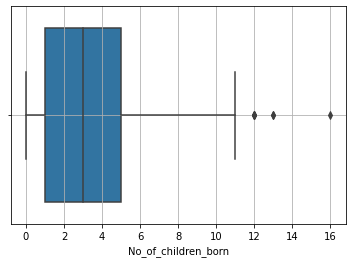

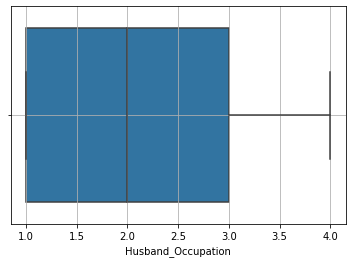

In [247]:
cols = ['Wife_age','No_of_children_born','Husband_Occupation']
for i in cols:
    sns.boxplot(df[i],whis=1.5);
    plt.grid()
    plt.show();

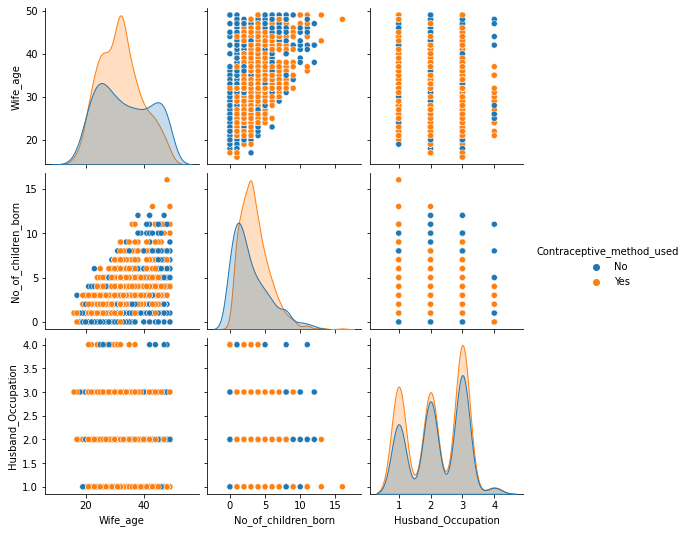

In [248]:
sns.pairplot(df , hue='Contraceptive_method_used' , diag_kind = 'kde')

In [249]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

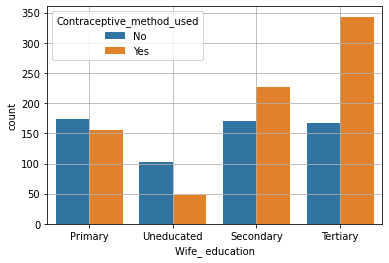

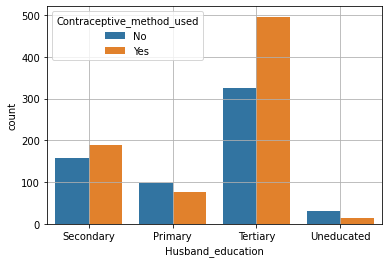

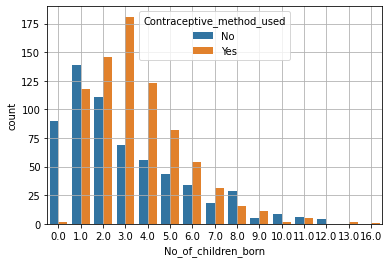

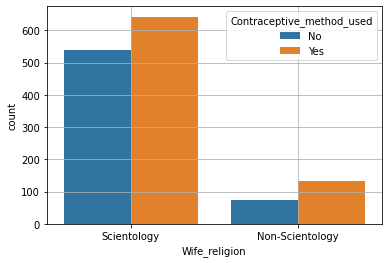

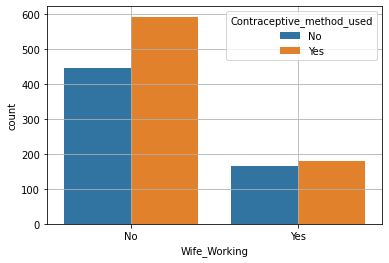

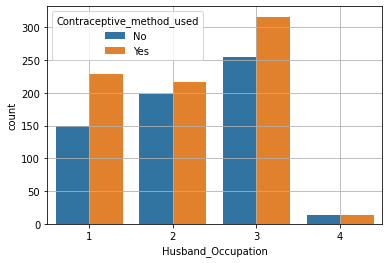

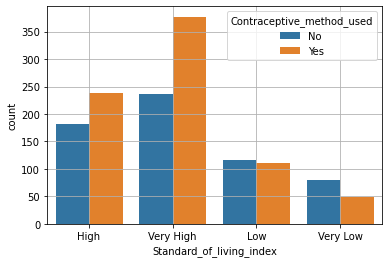

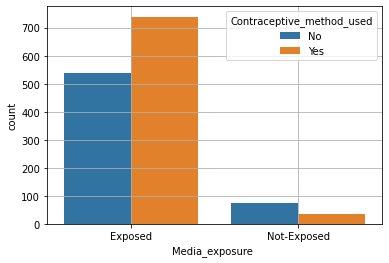

In [250]:
cols = ['Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ']
for i in cols:
    
    sns.countplot(data=df, x=df[i],hue='Contraceptive_method_used')
    plt.grid()
    plt.show();


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1388 non-null   float64
 1   Wife_ education            1388 non-null   object 
 2   Husband_education          1388 non-null   object 
 3   No_of_children_born        1388 non-null   float64
 4   Wife_religion              1388 non-null   object 
 5   Wife_Working               1388 non-null   object 
 6   Husband_Occupation         1388 non-null   int64  
 7   Standard_of_living_index   1388 non-null   object 
 8   Media_exposure             1388 non-null   object 
 9   Contraceptive_method_used  1388 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 151.6+ KB


In [252]:
df['No_of_children_born']=np.where(df['No_of_children_born']>10,10,df['No_of_children_born'])

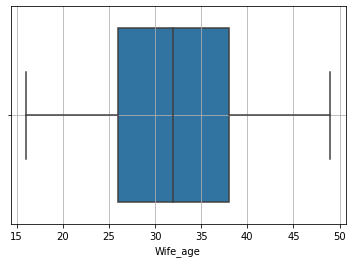

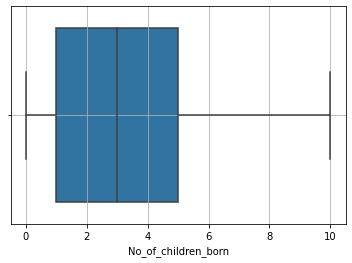

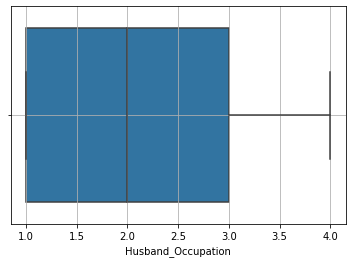

In [253]:
cols = ['Wife_age','No_of_children_born','Husband_Occupation']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.show();

In [254]:

df['Husband_Occupation'] = df['Husband_Occupation'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1388 non-null   float64
 1   Wife_ education            1388 non-null   object 
 2   Husband_education          1388 non-null   object 
 3   No_of_children_born        1388 non-null   float64
 4   Wife_religion              1388 non-null   object 
 5   Wife_Working               1388 non-null   object 
 6   Husband_Occupation         1388 non-null   object 
 7   Standard_of_living_index   1388 non-null   object 
 8   Media_exposure             1388 non-null   object 
 9   Contraceptive_method_used  1388 non-null   object 
dtypes: float64(2), object(8)
memory usage: 151.6+ KB


In [255]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Wife_ education
Tertiary      510
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64


Husband_education
Tertiary      822
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64


Wife_religion
Scientology        1182
Non-Scientology     206
Name: Wife_religion, dtype: int64


Wife_Working
No     1040
Yes     348
Name: Wife_Working, dtype: int64


Husband_Occupation
3    570
2    414
1    377
4     27
Name: Husband_Occupation, dtype: int64


Standard_of_living_index
Very High    613
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64


Media_exposure 
Exposed        1279
Not-Exposed     109
Name: Media_exposure , dtype: int64


Contraceptive_method_used
Yes    774
No     614
Name: Contraceptive_method_used, dtype: int64




In [256]:
df['Wife_ education']=np.where(df['Wife_ education']=='Uneducated',0,df['Wife_ education'])
df['Wife_ education']=np.where(df['Wife_ education']=='Primary',1,df['Wife_ education'])
df['Wife_ education']=np.where(df['Wife_ education']=='Secondary',2,df['Wife_ education'])
df['Wife_ education']=np.where(df['Wife_ education']=='Tertiary',3,df['Wife_ education'])


In [135]:
df['Husband_education']=np.where(df['Husband_education']=='Uneducated',0,df['Husband_education'])
df['Husband_education']=np.where(df['Husband_education']=='Primary',1,df['Husband_education'])
df['Husband_education']=np.where(df['Husband_education']=='Secondary',2,df['Husband_education'])
df['Husband_education']=np.where(df['Husband_education']=='Tertiary',3,df['Husband_education'])


In [136]:
df['Standard_of_living_index']=np.where(df['Standard_of_living_index']=='Very Low',0,df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index']=='Low',1,df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index']=='High',2,df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index']=='Very High',3,df['Standard_of_living_index'])

In [137]:
df['Contraceptive_method_used']=np.where(df['Contraceptive_method_used']=='No',0,df['Contraceptive_method_used'])
df['Contraceptive_method_used']=np.where(df['Contraceptive_method_used']=='Yes',1,df['Contraceptive_method_used'])

In [138]:

df['Wife_ education'] = df['Wife_ education'].astype('int64')
df['Husband_education'] = df['Husband_education'].astype('int64')
df['Standard_of_living_index'] = df['Husband_education'].astype('int64')
df['Contraceptive_method_used'] = df['Contraceptive_method_used'].astype('int64')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1388 non-null   float64
 1   Wife_ education            1388 non-null   int64  
 2   Husband_education          1388 non-null   int64  
 3   No_of_children_born        1388 non-null   float64
 4   Wife_religion              1388 non-null   object 
 5   Wife_Working               1388 non-null   object 
 6   Husband_Occupation         1388 non-null   object 
 7   Standard_of_living_index   1388 non-null   int64  
 8   Media_exposure             1388 non-null   object 
 9   Contraceptive_method_used  1388 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 151.6+ KB


In [190]:
df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.head().T

,0,1,2,3,4
Wife_age,24.0,45.0,43.0,42.0,36.0
Wife_ education,1.0,0.0,1.0,2.0,2.0
Husband_education,2.0,2.0,2.0,1.0,2.0
No_of_children_born,3.0,10.0,7.0,9.0,8.0
Standard_of_living_index,2.0,2.0,2.0,1.0,2.0
Contraceptive_method_used,0.0,0.0,0.0,0.0,0.0
Wife_religion_Scientology,1.0,1.0,1.0,1.0,1.0
Wife_Working_Yes,0.0,0.0,0.0,0.0,0.0
Husband_Occupation_2,1.0,0.0,0.0,0.0,0.0
Husband_Occupation_3,0.0,1.0,1.0,1.0,1.0


In [141]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1472
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Wife_age                     1388 non-null   float64
 1   Wife_ education              1388 non-null   int64  
 2   Husband_education            1388 non-null   int64  
 3   No_of_children_born          1388 non-null   float64
 4   Standard_of_living_index     1388 non-null   int64  
 5   Contraceptive_method_used    1388 non-null   int64  
 6   Wife_religion_Scientology    1388 non-null   uint8  
 7   Wife_Working_Yes             1388 non-null   uint8  
 8   Husband_Occupation_2         1388 non-null   uint8  
 9   Husband_Occupation_3         1388 non-null   uint8  
 10  Husband_Occupation_4         1388 non-null   uint8  
 11  Media_exposure _Not-Exposed  1388 non-null   uint8  
dtypes: float64(2), int64(4), uint8(6)
memory usage: 116.3 KB


In [142]:
# Copy all the predictor variables into X dataframe
X = df_dummy.drop('Contraceptive_method_used', axis=1)

# Copy target into the y dataframe. 
y = df_dummy['Contraceptive_method_used']

In [143]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df_dummy['Contraceptive_method_used'])

In [144]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [145]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [146]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.586671,0.413329
1,0.974772,0.025228
2,0.228709,0.771291
3,0.463992,0.536008
4,0.371256,0.628744


In [147]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6683831101956745

Train_AUC: 0.714
Test_AUC: 0.674


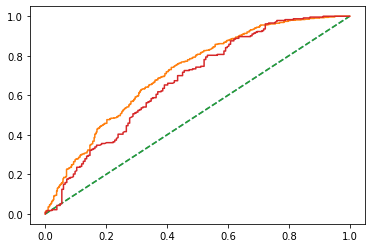

In [191]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('Train_AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test_AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [149]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6546762589928058

AUC: 0.674


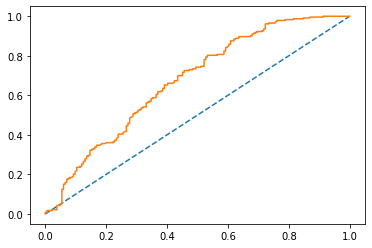

In [150]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


In [151]:
confusion_matrix(y_train, ytrain_predict)

array([[221, 209],
       [113, 428]])

In [152]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [153]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.66      0.51      0.58       430
           1       0.67      0.79      0.73       541

    accuracy                           0.67       971
   macro avg       0.67      0.65      0.65       971
weighted avg       0.67      0.67      0.66       971



In [154]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.47      0.54       184
           1       0.66      0.80      0.72       233

    accuracy                           0.65       417
   macro avg       0.65      0.63      0.63       417
weighted avg       0.65      0.65      0.64       417



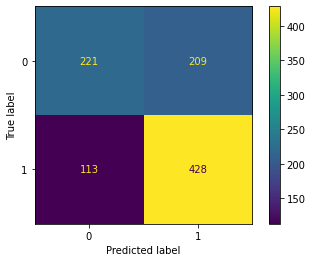

In [155]:
cm = confusion_matrix(y_train, ytrain_predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

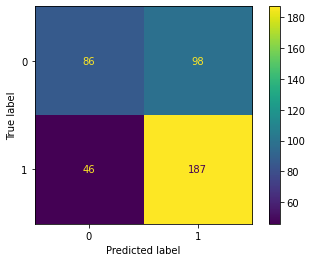

In [156]:
cm = confusion_matrix(y_test, ytest_predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

## LDA

In [157]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [158]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train,y_train)

In [159]:
#intercept value
clf.intercept_ 

array([0.86200858])

In [160]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-0.07226336,  0.54541477,  0.03450585,  0.33889439,  0.03450585,
        -0.62522037, -0.14375443, -0.07552122,  0.15026109,  1.29920336,
        -0.60731348]])

In [161]:
X_train.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Standard_of_living_index',
       'Wife_religion_Scientology', 'Wife_Working_Yes', 'Husband_Occupation_2',
       'Husband_Occupation_3', 'Husband_Occupation_4',
       'Media_exposure _Not-Exposed'],
      dtype='object')

In [162]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.07,  0.55,  0.03,  0.34,  0.03, -0.63, -0.14, -0.08,  0.15,
         1.3 , -0.61]])

In [163]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model1.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model1.predict(X_test)

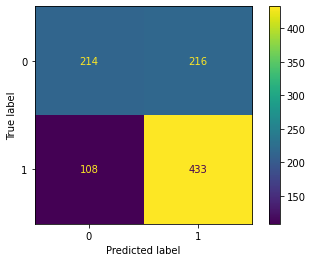

In [164]:
cm = confusion_matrix(y_train, pred_class_train, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model1.classes_)
disp.plot()
plt.show()

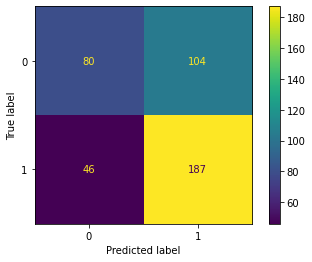

In [165]:
cm = confusion_matrix(y_test,pred_class_test, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model1.classes_)
disp.plot()
plt.show()

In [166]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.66      0.50      0.57       430
           1       0.67      0.80      0.73       541

    accuracy                           0.67       971
   macro avg       0.67      0.65      0.65       971
weighted avg       0.67      0.67      0.66       971
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.63      0.43      0.52       184
           1       0.64      0.80      0.71       233

    accuracy                           0.64       417
   macro avg       0.64      0.62      0.61       417
weighted avg       0.64      0.64      0.63       417
 



In [167]:
# Training Data Probability Prediction
pred_prob_train = model1.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model1.predict_proba(X_test)

AUC for the Training Data: 0.714
AUC for the Test Data: 0.671


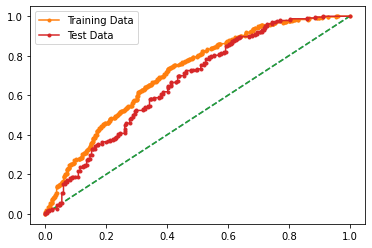

In [168]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

##DT

In [169]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [194]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini',  max_depth = 3,min_samples_leaf=20,min_samples_split=30,random_state=1)

In [195]:
# Fit the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, min_samples_split=30,
                       random_state=1)

In [196]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()


In [197]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                                  Imp
No_of_children_born          0.499463
Wife_age                     0.273178
Wife_ education              0.224789
Standard_of_living_index     0.002570
Husband_education            0.000000
Wife_religion_Scientology    0.000000
Wife_Working_Yes             0.000000
Husband_Occupation_2         0.000000
Husband_Occupation_3         0.000000
Husband_Occupation_4         0.000000
Media_exposure _Not-Exposed  0.000000


In [198]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

In [199]:
ytest_predict_prob=dt_model.predict_proba(X_test)


In [200]:
import matplotlib.pyplot as plt

Train_AUC: 0.730
Test_AUC: 0.687


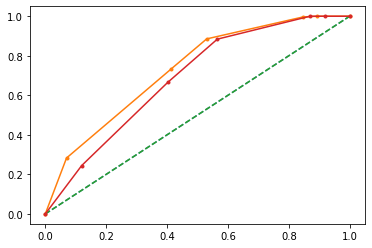

In [201]:
# predict probabilities
probs = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('Train_AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# predict probabilities
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('Test_AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.687


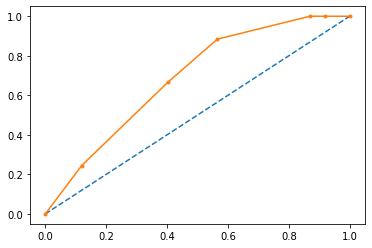

In [202]:
# predict probabilities
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [203]:
from sklearn.metrics import classification_report,confusion_matrix

In [208]:
print(classification_report(y_train, ytrain_predict))
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.47      0.58       430
           1       0.68      0.89      0.77       541

    accuracy                           0.70       971
   macro avg       0.72      0.68      0.67       971
weighted avg       0.72      0.70      0.69       971

              precision    recall  f1-score   support

           0       0.75      0.43      0.55       184
           1       0.66      0.88      0.76       233

    accuracy                           0.69       417
   macro avg       0.71      0.66      0.65       417
weighted avg       0.70      0.69      0.67       417



In [205]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55       184
           1       0.66      0.88      0.76       233

    accuracy                           0.69       417
   macro avg       0.71      0.66      0.65       417
weighted avg       0.70      0.69      0.67       417



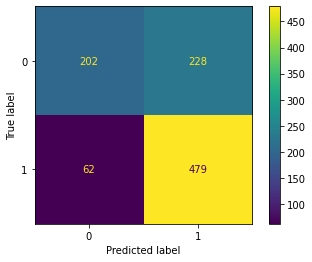

In [206]:
cm = confusion_matrix(y_train,ytrain_predict, labels=dt_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt_model.classes_)
disp.plot()
plt.show()

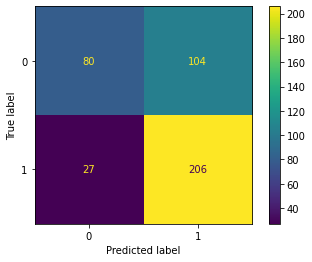

In [207]:
cm = confusion_matrix(y_test,ytest_predict, labels=dt_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt_model.classes_)
disp.plot()
plt.show()

In [184]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Set seed to 1 for reproducibility
SEED = 1
# Instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(random_state=SEED)

In [185]:
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters 'params_dt'
params_dt = {
'max_depth': [3, 4,5, 6,7,8],
'min_samples_leaf': [10,20,30,40,50,60,70],
'min_samples_split': [30,40,50,60,70,80,90]
}
# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt,
param_grid=params_dt,
scoring=
'accuracy'
,
cv=5,
n_jobs=-1)
# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70],
                         'min_samples_split': [30, 40, 50, 60, 70, 80, 90]},
             scoring='accuracy')

In [186]:
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n'
, best_hyperparams)


Best hyerparameters:
 {'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 30}


In [187]:
best_CV_score = grid_dt.best_score_
print('Best CV accuracy'.format(best_CV_score))

Best CV accuracy


In [188]:
# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_
# Evaluate test set accuracy
train_acc = best_model.score(X_train,y_train)
# Print test set accuracy
print("Train set accuracy of best model: {:.3f}".format(train_acc))


Train set accuracy of best model: 0.718


In [189]:
# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_
# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)
# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))


Test set accuracy of best model: 0.676
